In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Modeling Process (Building a Predictive Model)

#### 1. Determine the purpose: 

Let’s assume that the purpose of our data mining project is **to predict the value of homes in West Roxbury for new records**( -> Predictive Model!).

#### 2. Obtain the data: 

We will use the 2014 West Roxbury housing data. The dataset in question is small enough that we do not need to sample from it — we can use it in its entirety.

#### 3. Explore, clean, and preprocess the data: 

Let’s look first at the description of the variables, also known as the “data dictionary,” to be sure that we understand them all. The variable names and descriptions in this dataset all seem fairly straightforward, but this is not always the case. Often, variable names are cryptic and their descriptions may be unclear or missing.

It is useful to pause and think about what the variables mean and whether they should be included in the model. Consider the variable TAX. At first glance, we consider that the tax on a home is usually a function of its assessed value, so there is some circularity in the model—we want to predict a home’s value using TAX as a predictor, yet TAX itself is determined by a home’s value. TAX might be a very good predictor of home value in a numerical sense, but would it be useful if we wanted to apply our model to homes whose assessed value might not be known? For this reason, we will exclude TAX from the analysis.

It is also useful to check for outliers that might be errors. For example, suppose that the column FLOORS (number of floors) looked like the one in Table 2.11, after sorting the data in descending order based on floors. We can tell right away that the 15 is in error — it is unlikely that a home has 15 floors. Since all other values are between 1 and 2, the decimal was probably misplaced and the value should be 1. Lastly, we create dummy variables for categorical variables. Here we have one categorical variable: REMODEL, which has three categories.

#### 4. Reduce the data dimension: 

The West Roxbury dataset has been prepared for presentation with fairly **low dimension** — it has only 13 variables, and the single categorical variable considered has only three categories (and hence adds two dummy variables when used in a linear regression model). If we had many more variables, at this stage we might want to apply a variable reduction technique, such as condensing multiple categories into a smaller number, or applying principal components analysis to consolidate multiple similar numerical variables (e.g., LIVING AREA, ROOMS, BEDROOMS, BATH, HALF BATH) into a smaller number of variables.


#### 5. Determine the data mining task: 

The specific task is to **predict the value of TOTAL VALUE using the predictor variables**(This is our goal for modeling!). This is a **supervised prediction task**. For simplicity, we excluded several additional variables present in the original dataset, which have many categories (BLDG TYPE, ROOF TYPE, and EXT FIN). We therefore use **all the numerical variables** (except TAX) and the dummies created for the remaining categorical variables.


#### 6. Partition the data (for supervised tasks): 

In this case we divide the data into two partitions: training and validation. The training partition is used to build the model, and the validation partition is used to see how well the model does when applied to new data. We need to specify the percent of the data used in each partition. Note: Although not used in our example, a test partition might also be used.


#### 7. Choose the technique: 

In this case, it is **multiple linear regression**. Having divided the data into training and validation partitions, we can build a multiple linear regression model with the training data. We want to predict the value of a house in West Roxbury on the basis of all the other predictors (except TAX).

#### 8. Use the algorithm to perform the task: 

In Python, we use the **scikit-learn LinearRegression method** to predict house value with the training data, then use the same model to predict values for the validation data. Chapter 6 on linear regression goes into more detail. 

#### 9. Interpret the results: 

At this stage, we would typically try other prediction algorithms (e.g.,regression trees) and see how they do error-wise. We might also try different “settings” on the various models (e.g., we could use the best subsets variable selection approach in multiple linear regression to choose a reduced set of variables that might perform better with the validation data).

After choosing the best model—typically, the model with the lowest error on the validation data
while also recognizing that “simpler is better”—we use that model to predict the output variable in
fresh data. These steps are covered in more detail in the analysis of cases.

#### 10. Deploy the model: 

After the best model is chosen, it is applied to new data to predict TOTAL VALUE for homes where this value is unknown. This was, of course, the original purpose!

Predicting the output value for new records is called `scoring`. 
- For predictive tasks, scoring produces predicted numerical values. 
- For classification tasks, scoring produces classes and/or propensities. 

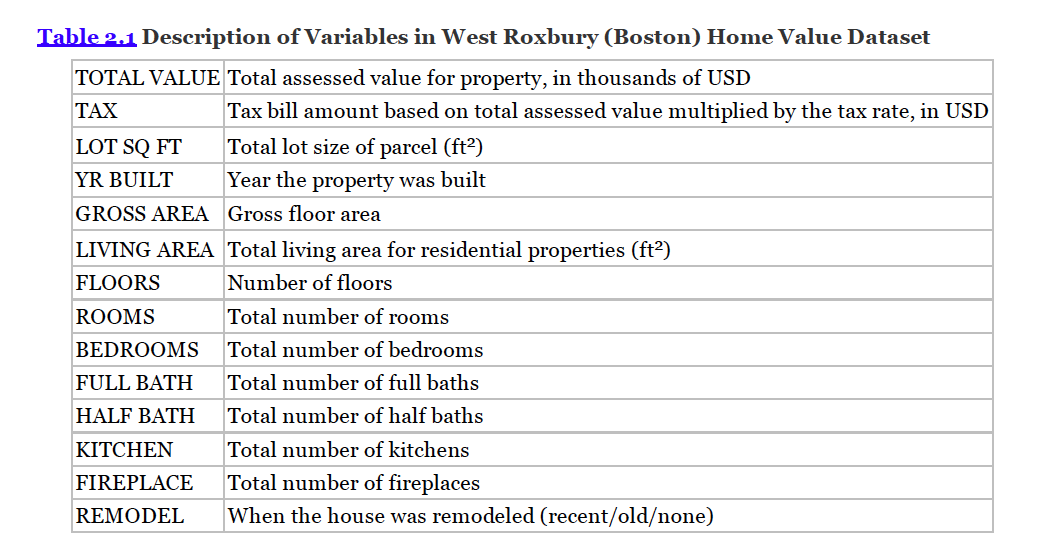

In [2]:
#!pip install IPython 
from IPython.display import Image
Image("WestRoxbury_description.png")

# Preliminary Steps

## Data Loading

In [3]:
# Import required packages
import pandas as pd
# Load data
housing_df = pd.read_csv('WestRoxbury.csv')
housing_df.shape # find the dimension of data frame

(5802, 14)

In [4]:
housing_df.head() # show the first five rows

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


In [5]:
print(housing_df) # show all the data

      TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0            344.2  4330       9965      1880         2436         1352   
1            412.6  5190       6590      1945         3108         1976   
2            330.1  4152       7500      1890         2294         1371   
3            498.6  6272      13773      1957         5032         2608   
4            331.5  4170       5000      1910         2370         1438   
...            ...   ...        ...       ...          ...          ...   
5797         404.8  5092       6762      1938         2594         1714   
5798         407.9  5131       9408      1950         2414         1333   
5799         406.5  5113       7198      1987         2480         1674   
5800         308.7  3883       6890      1946         2000         1000   
5801         447.6  5630       7406      1950         2510         1600   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE  \
0         2.0      6  

In [6]:
# Rename columns: replace spaces with '_' to allow dot notation
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'}) # explicit
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns] # all columns
housing_df.head() # show the first five rows

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


In [7]:
# Different ways of showing the first 4 rows of the data (특정 행 추출하기)
housing_df.loc[0:3] # loc[a:b] gives rows a to b, inclusive
housing_df.iloc[0:4] # iloc[a:b] gives rows a to b-1

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None


In [8]:
# Different ways of showing the first 10 values in column TOTAL_VALUE (특정 열의 데이터 추출하기)
housing_df['TOTAL_VALUE'].iloc[0:10]
housing_df.iloc[0:10]['TOTAL_VALUE']
housing_df.iloc[0:10].TOTAL_VALUE # use dot notation if the column name has no spaces

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [9]:
# Different ways of showing the fifth row of the first 10 columns (특정 행의 데이터 추출하기)
housing_df.iloc[4][0:10]
housing_df.iloc[4, 0:10]
housing_df.iloc[4:5, 0:10] # use a slice to return a data frame

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


In [10]:
# Use pd.concat to combine non-consecutive columns into a new data frame. (특정 열 쪼개서 합치기)
# The axis argument specifies the dimension along which the concatenation happens, 0=rows, 1=columns.
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


In [11]:
# To specify a full column, use:
housing_df.iloc[:,0:1]

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6
4,331.5
...,...
5797,404.8
5798,407.9
5799,406.5
5800,308.7


In [12]:
housing_df.TOTAL_VALUE
housing_df['TOTAL_VALUE'][0:10] # show the first 10 rows of the first column

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [13]:
# Descriptive statistics
print('Number of rows ', len(housing_df['TOTAL_VALUE'])) # show length of first column
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean()) # show mean of column
housing_df.describe() # show summary statistics for each column

Number of rows  5802
Mean of TOTAL_VALUE  392.6857149258885


,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


## Sampling from a Database

In [14]:
# random sample of 5 observations
housing_df.sample(5)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
1881,286.2,3600,4275,1935,1997,905,1.0,6,2,1,0,1,0,None
2146,370.8,4664,5246,1931,2754,1544,2.0,7,3,1,0,1,1,None
2332,427.1,5372,12325,1940,2242,1408,2.0,6,2,1,1,1,0,None
479,299.1,3762,4772,1900,2652,1584,2.0,6,3,1,0,1,0,None
2003,391.4,4923,2533,2001,2897,1735,2.0,7,3,3,1,1,1,None


In [15]:
# oversample houses with over 10 rooms
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
3111,713.1,8970,13113,1909,6244,3176,2.0,12,6,2,1,1,1,None
5675,478.6,6020,6500,1957,3748,2280,2.0,12,5,2,1,1,1,Recent
3066,462.2,5814,6625,1880,4074,2349,2.0,13,6,1,2,1,0,None
4291,434.8,5469,4018,1930,3424,2029,2.0,12,4,1,1,1,1,None
3488,771.0,9699,27408,1914,5786,3050,2.0,12,4,3,0,1,0,Recent


## Reviewing variables in pandas

In [16]:
housing_df.columns # print a list of variables

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [17]:
housing_df.REMODEL.dtype # (Python) objects

dtype('O')

In [18]:
# REMODEL needs to be converted to a categorical variable
housing_df.REMODEL = housing_df.REMODEL.astype('category')
housing_df.REMODEL.cat.categories # Show number of categories. Setting assigns new values to each category 

Index(['None', 'Old', 'Recent'], dtype='object')

In [19]:
housing_df.REMODEL.dtype # Check type of converted variable

CategoricalDtype(categories=['None', 'Old', 'Recent'], ordered=False)

## Handling Categorical Variables (Creating Dummy Variables)

In [20]:
# create dummy variables : pd.get_dummies()
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True) # use drop_first=True to drop the first dummy variable
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [21]:
housing_df.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5)

,REMODEL_Old,REMODEL_Recent
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


## Missing Data (NA, Not available, 결측치)

In [22]:
housing_df['BEDROOMS'].isna().sum()

0

In [23]:
# To illustrate missing data procedures, we first convert a few entries for bedrooms to NA's. (랜덤으로 결측값 10개를 의도적으로 만듦)
missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', housing_df['BEDROOMS'].count())
housing_df['BEDROOMS'].isna().sum()

Number of rows with valid BEDROOMS values after setting to NAN:  5792


10

In [24]:
# remove rows with missing values : dropna()
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  5792


In [25]:
# replace the missing values using the median of the remaining values : fillna()
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ', housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after filling NA values:  5802


## Normalizing (Standardizing) and Rescaling Data
To normalize a variable, we subtract the mean from each value and then divide by the standard deviation. Normalizing is one way to bring all variables to the same scale. Another popular approach is rescaling
each variable to a [0, 1] scale. This is done by subtracting the minimum value and then dividing by the
range.

To consider why normalizing or scaling to [0, 1] might be necessary, consider the case of clustering.

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.copy()
df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,4330,9965,1880,2436,1352,2.0,6,3.0,1,1,1,0,0,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4.0,2,1,1,0,0,1
2,330.1,4152,7500,1890,2294,1371,2.0,8,4.0,1,1,1,0,0,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5.0,1,1,1,1,0,0
4,331.5,4170,5000,1910,2370,1438,2.0,7,3.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3.0,2,1,1,1,0,1
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3.0,1,1,1,1,0,0
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3.0,1,1,1,1,0,0
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2.0,1,0,1,0,0,0


In [27]:
# Normalizing a data frame
# pandas version:
norm_df = (housing_df - housing_df.mean()) / housing_df.std()
norm_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,-0.488879,-0.488507,1.381019,-1.576690,-0.552998,-0.564458,0.710905,-0.691980,-0.272482,-0.568528,0.723202,-0.124803,-1.309337,-0.33356,-0.421381
1,0.200795,0.200789,0.116835,0.229372,0.207196,0.590121,0.710905,2.090325,0.909973,1.347035,0.723202,-0.124803,-1.309337,-0.33356,2.372738
2,-0.631048,-0.631176,0.457697,-1.298834,-0.713635,-0.529303,0.710905,0.699173,0.909973,-0.568528,0.723202,-0.124803,-1.309337,-0.33356,-0.421381
3,1.067927,1.068020,2.807392,0.562799,2.383704,1.759502,-1.536872,1.394749,2.092428,-0.568528,0.723202,-0.124803,0.460235,-0.33356,-0.421381
4,-0.616932,-0.616749,-0.478735,-0.743123,-0.627660,-0.405334,0.710905,0.003597,-0.272482,1.347035,-1.150021,-0.124803,-1.309337,-0.33356,-0.421381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.122148,0.122241,0.181262,0.034873,-0.374262,0.105345,0.710905,1.394749,-0.272482,1.347035,0.723202,-0.124803,0.460235,-0.33356,2.372738
5798,0.153405,0.153500,1.172381,0.368300,-0.577886,-0.599614,0.710905,-0.691980,-0.272482,-0.568528,0.723202,-0.124803,0.460235,-0.33356,-0.421381
5799,0.139289,0.139073,0.344576,1.396366,-0.503224,0.031334,0.710905,0.003597,-0.272482,-0.568528,0.723202,-0.124803,0.460235,-0.33356,-0.421381
5800,-0.846823,-0.846781,0.229207,0.257158,-1.046220,-1.215759,-1.536872,-1.387556,-1.454938,-0.568528,-1.150021,-0.124803,-1.309337,-0.33356,-0.421381


In [28]:
# Normalizing a data frame
# scikit-learn version:
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), index=housing_df.index, columns=housing_df.columns)
norm_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,-0.488921,-0.488550,1.381138,-1.576825,-0.553046,-0.564507,0.710966,-0.692039,-0.272506,-0.568577,0.723264,-0.124814,-1.309450,-0.333589,-0.421418
1,0.200812,0.200806,0.116845,0.229392,0.207214,0.590172,0.710966,2.090505,0.910051,1.347151,0.723264,-0.124814,-1.309450,-0.333589,2.372943
2,-0.631102,-0.631230,0.457736,-1.298946,-0.713696,-0.529349,0.710966,0.699233,0.910051,-0.568577,0.723264,-0.124814,-1.309450,-0.333589,-0.421418
3,1.068020,1.068112,2.807634,0.562847,2.383909,1.759654,-1.537005,1.394869,2.092608,-0.568577,0.723264,-0.124814,0.460275,-0.333589,-0.421418
4,-0.616985,-0.616802,-0.478777,-0.743187,-0.627714,-0.405369,0.710966,0.003597,-0.272506,1.347151,-1.150120,-0.124814,-1.309450,-0.333589,-0.421418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.122158,0.122252,0.181277,0.034876,-0.374295,0.105355,0.710966,1.394869,-0.272506,1.347151,0.723264,-0.124814,0.460275,-0.333589,2.372943
5798,0.153418,0.153513,1.172483,0.368332,-0.577935,-0.599666,0.710966,-0.692039,-0.272506,-0.568577,0.723264,-0.124814,0.460275,-0.333589,-0.421418
5799,0.139301,0.139085,0.344605,1.396486,-0.503267,0.031337,0.710966,0.003597,-0.272506,-0.568577,0.723264,-0.124814,0.460275,-0.333589,-0.421418
5800,-0.846896,-0.846854,0.229227,0.257180,-1.046310,-1.215864,-1.537005,-1.387675,-1.455063,-0.568577,-1.150120,-0.124814,-1.309450,-0.333589,-0.421418


In [29]:
# the result of the transformation is a numpy array, we convert it into a dataframe
# Rescaling a data frame
# pandas version:
norm_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())
norm_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,0.214953,0.215015,0.197472,0.934858,0.220237,0.177220,0.5,0.272727,0.250,0.00,0.333333,0.0,0.00,0.0,0.0
1,0.276420,0.276448,0.123156,0.967181,0.311878,0.307628,0.5,0.636364,0.375,0.25,0.333333,0.0,0.00,0.0,1.0
2,0.202283,0.202300,0.143194,0.939831,0.200873,0.181191,0.5,0.454545,0.375,0.00,0.333333,0.0,0.00,0.0,0.0
3,0.353702,0.353740,0.281323,0.973148,0.574253,0.439707,0.0,0.545455,0.500,0.00,0.333333,0.0,0.25,0.0,0.0
4,0.203541,0.203586,0.088145,0.949776,0.211237,0.195193,0.5,0.363636,0.250,0.25,0.000000,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.269410,0.269448,0.126943,0.963700,0.241784,0.252874,0.5,0.545455,0.250,0.25,0.333333,0.0,0.25,0.0,1.0
5798,0.272196,0.272234,0.185207,0.969667,0.217237,0.173250,0.5,0.272727,0.250,0.00,0.333333,0.0,0.25,0.0,0.0
5799,0.270938,0.270948,0.136544,0.988066,0.226238,0.244514,0.5,0.363636,0.250,0.00,0.333333,0.0,0.25,0.0,0.0
5800,0.183052,0.183085,0.129762,0.967678,0.160780,0.103657,0.0,0.181818,0.125,0.00,0.000000,0.0,0.00,0.0,0.0


In [30]:
# Rescaling a data frame
# scikit-learn:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), index=housing_df.index, columns=housing_df.columns)
norm_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,0.214953,0.215015,0.197472,0.934858,0.220237,0.177220,0.5,0.272727,0.250,0.00,0.333333,0.0,0.00,0.0,0.0
1,0.276420,0.276448,0.123156,0.967181,0.311878,0.307628,0.5,0.636364,0.375,0.25,0.333333,0.0,0.00,0.0,1.0
2,0.202283,0.202300,0.143194,0.939831,0.200873,0.181191,0.5,0.454545,0.375,0.00,0.333333,0.0,0.00,0.0,0.0
3,0.353702,0.353740,0.281323,0.973148,0.574253,0.439707,0.0,0.545455,0.500,0.00,0.333333,0.0,0.25,0.0,0.0
4,0.203541,0.203586,0.088145,0.949776,0.211237,0.195193,0.5,0.363636,0.250,0.25,0.000000,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.269410,0.269448,0.126943,0.963700,0.241784,0.252874,0.5,0.545455,0.250,0.25,0.333333,0.0,0.25,0.0,1.0
5798,0.272196,0.272234,0.185207,0.969667,0.217237,0.173250,0.5,0.272727,0.250,0.00,0.333333,0.0,0.25,0.0,0.0
5799,0.270938,0.270948,0.136544,0.988066,0.226238,0.244514,0.5,0.363636,0.250,0.00,0.333333,0.0,0.25,0.0,0.0
5800,0.183052,0.183085,0.129762,0.967678,0.160780,0.103657,0.0,0.181818,0.125,0.00,0.000000,0.0,0.00,0.0,0.0


# Predictive Power and Overfitting

## Data partitioning 

In **supervised learning**, a key question presents itself: `How well will our prediction or classification model perform when we apply it to new data?` 

We are particularly interested in comparing the performance of various models so that we can choose the one we think will do the best when it is implemented in practice. A key concept is to make sure that our chosen model generalizes beyond the dataset that we have at hand. To assure generalization, we use the concept of **data partitioning** and try
to **avoid overfitting**.

The more variables we include in a model, the greater the risk of overfitting the particular data used for modeling. 
To address the overfitting problem, we simply divide (partition) our data and develop our model using only one of the partitions. After we have a model, we try it out on another partition and see how it performs, which we can measure in several ways. In a classification model, we can count the proportion of held-back records that were misclassified. In a prediction model, we can measure the residuals (prediction errors) between the predicted values and the actual values. This evaluation approach in effect mimics the deployment scenario, where our model is applied to data that it hasn’t “seen.”

We typically deal with two or three partitions: **a training set**, **a validation set**, and sometimes an
additional **test set**. In most cases, the partitioning should be done randomly to minimize the chance of getting a biased partition.

1. Training Partition : Build model!
The training partition, typically the largest partition, contains the data used to build the various models
we are examining. The same training partition is generally used to develop multiple models.

2. Validation Partition : Evaluate model!
The validation partition (sometimes called the test partition) is used to assess the predictive
performance of each model so that you can compare models and choose the best one. In some
algorithms (e.g., classification and regression trees, k-nearest neighbors), the validation partition may
be used in an automated fashion to tune and improve the model.

3. Test Partition : Re-Evaluate model! (optional)
The test partition (sometimes called the holdout or evaluation partition) is used to assess the
performance of the chosen model with new data.

In [31]:
# random_state is set to a defined value to get the same partitions when re-running the code
# training 60%, validation 40%
trainData, validData = train_test_split(housing_df, test_size=0.40, random_state=1)
print('Original : ', housing_df.shape)
print('Training : ', trainData.shape)
print('Validation : ', validData.shape)

Original :  (5802, 15)
Training :  (3481, 15)
Validation :  (2321, 15)


In [32]:
# training 50%, validation 50% 중에서 60% (전체 30%) , test 50% 중에서 40% (전체 20%)
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Original : ', housing_df.shape)
print('Training : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test : ', testData.shape)

Original :  (5802, 15)
Training :  (2901, 15)
Validation :  (1740, 15)
Test :  (1161, 15)


## Cross-Validation

When the number of records in our sample is **small**, data partitioning might **NOT** be advisable as each
partition will contain too few records for model building and performance evaluation. Furthermore,
some data mining methods are sensitive to small changes in the training data, so that a different
partitioning can lead to different results. 

An alternative to data partitioning is **cross-validation**, which is especially useful with small samples. Cross-validation, or k-fold cross-validation, is a procedure that starts with partitioning the data into “folds,” or non-overlapping subsamples.

# Use the algorithm to perform the task

## Predictions (fitted values) for a sample of training data

In [33]:
from sklearn.linear_model import LinearRegression
# data loading and preprocessing
housing_df = pd.read_csv('WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)
# create list of predictors and outcome
excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'
# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)
train_pred = model.predict(train_X)
train_results = pd.DataFrame( {'TOTAL_VALUE': train_y, 'predicted': train_pred, 'residual': train_y - train_pred })
train_results.head()

,TOTAL_VALUE,predicted,residual
2024,392.0,387.726258,4.273742
5140,476.3,430.785540,45.514460
5259,367.4,384.042952,-16.642952
421,350.3,369.005551,-18.705551
1401,348.1,314.725722,33.374278


## Predictions for a sample of validation data code

In [34]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
'TOTAL_VALUE': valid_y,
'predicted': valid_pred,
'residual': valid_y - valid_pred
})
valid_results.head()

,TOTAL_VALUE,predicted,residual
1822,462.0,406.946377,55.053623
1998,370.4,362.888928,7.511072
5126,407.4,390.287208,17.112792
808,316.1,382.470203,-66.370203
4034,393.2,434.334998,-41.134998


## Prediction Error Metrics for training and validation data

In [35]:
!pip install dmba
# import the utility function regressionSummary
from dmba import regressionSummary
# training set
regressionSummary(train_results.TOTAL_VALUE, train_results.predicted)
# validation set
regressionSummary(valid_results.TOTAL_VALUE, valid_results.predicted)

no display found. Using non-interactive Agg backend

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 43.0306
            Mean Absolute Error (MAE) : 32.6042
          Mean Percentage Error (MPE) : -1.1116
Mean Absolute Percentage Error (MAPE) : 8.4886

Regression statistics

                      Mean Error (ME) : -0.1463
       Root Mean Squared Error (RMSE) : 42.7292
            Mean Absolute Error (MAE) : 31.9663
          Mean Percentage Error (MPE) : -1.0884
Mean Absolute Percentage Error (MAPE) : 8.3283


## Data frame with three records to be scored

In [36]:
new_data = pd.DataFrame({
'LOT_SQFT': [4200, 6444, 5035],
'YR_BUILT': [1960, 1940, 1925],
'GROSS_AREA': [2670, 2886, 3264],
'LIVING_AREA': [1710, 1474, 1523],
'FLOORS': [2.0, 1.5, 1.9],
'ROOMS': [10, 6, 6],
'BEDROOMS': [4, 3, 2],
'FULL_BATH': [1, 1, 1],
'HALF_BATH': [1, 1, 0],
'KITCHEN': [1, 1, 1],
'FIREPLACE': [1, 1, 0],
'REMODEL_Old': [0, 0, 0],
'REMODEL_Recent': [0, 0, 1],
})
print(new_data)
print('Predictions: ', model.predict(new_data))

   LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  REMODEL_Recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  
Predictions:  [384.47210285 378.06696706 386.01773842]
